# Аппроксимация функций

In [1]:
import numpy as np

t = np.arange(1, 6, 0.025)
x = np.sin(t ** 2 - 10 * t + 3)

In [2]:
from linearnn import LinearNN

linear_nn = LinearNN()
linear_nn.fit_timeseries(train_data=x, epochs=50, verbose=True)

Performed 10 epoch(s) out of 50. Accumulative squared error 0.02001388219154469.
Performed 20 epoch(s) out of 50. Accumulative squared error 0.01984644845989937.
Performed 30 epoch(s) out of 50. Accumulative squared error 0.019684325400514055.
Performed 40 epoch(s) out of 50. Accumulative squared error 0.019523642820445528.
Performed 50 epoch(s) out of 50. Accumulative squared error 0.019364387537752634.


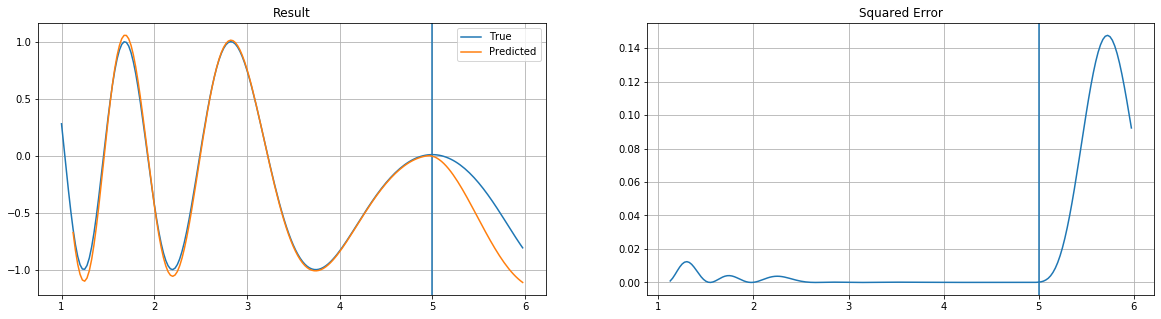

In [3]:
# Одношаговый прогноз
pred_x = [linear_nn.predict(x[i - 5: i]) for i in range(5, t.shape[0] - 40)]
# Многошаговый прогноз
for i in range(t.shape[0] - 45, t.shape[0] - 5):
    pred_x.append(linear_nn.predict(np.array(pred_x[i - 5: i])))
pred_x = np.array(pred_x)

import pylab as plt
%matplotlib inline

fig, axes = plt.subplots(ncols=2, figsize=(20, 5))

axes[0].axvline(x=5.0)
axes[1].axvline(x=5.0)

axes[0].plot(t, x, label='True')
axes[0].plot(t[5:], pred_x, label='Predicted')
axes[0].set_title('Result')
axes[0].grid()
axes[0].legend()

axes[1].plot(t[5:], (x[5:] - pred_x) ** 2)
axes[1].set_title('Squared Error')
axes[1].grid()


# Фильтрация сигнала

In [9]:
t = np.arange(0, 3.5, 0.01)
x = np.sin(-2*t**2 + 7*t)
y = 0.125 * np.sin(-2*t**2 + 7*t - np.pi)

In [10]:
linear_nn = LinearNN()
linear_nn.fit_filter(x=x, y=y, epochs=20, verbose=True)

Performed 10 epoch(s) out of 20. Accumulative squared error 0.0019587258733214786.
Performed 20 epoch(s) out of 20. Accumulative squared error 2.008336588848856e-05.


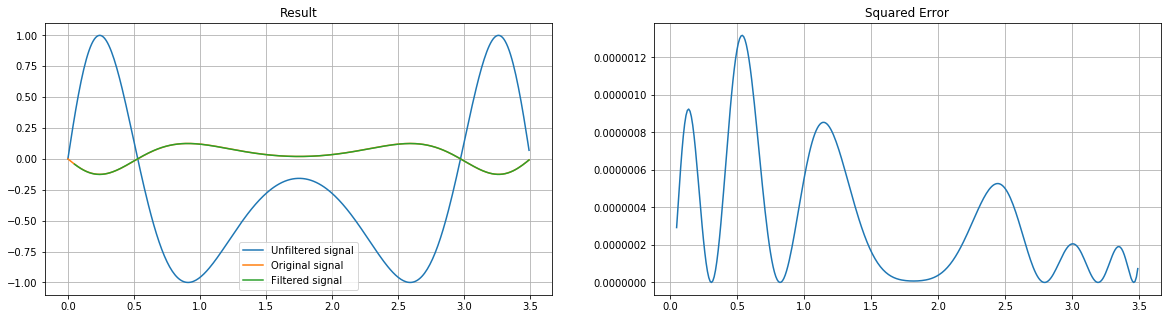

In [11]:
pred_y = np.array([linear_nn.predict(x[i - 5: i]) for i in range(5, x.shape[0])])
fig, axes = plt.subplots(ncols=2, figsize=(20, 5))

axes[0].plot(t, x, label='Unfiltered signal')
axes[0].plot(t, y, label='Original signal')
axes[0].plot(t[5:], pred_y, label='Filtered signal')
axes[0].set_title('Result')
axes[0].grid()
axes[0].legend()

axes[1].plot(t[5:], (y[5:] - pred_y) ** 2)
axes[1].set_title('Squared Error')
axes[1].grid()